# 데이터 불러오기 및 라이브러리 설치

In [1]:
## 라이브러리 설치

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
import colour
from colour import Color
import missingno as msno
import json
import geopandas as gpd
import folium
import shap
from sklearn import svm
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score

import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='white')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

In [2]:
## 데이터 불러오기

cluster=pd.read_csv('C://Users//User//Desktop//final_1031_data.csv', encoding='cp949')

In [3]:
## 필요없는 변수 제거하기

del cluster['Unnamed: 0.1']
del cluster['Unnamed: 0']
del cluster['전기차비율_s'] 
del cluster['온실가스비율_s'] 
del cluster['전기차관심도_s']

In [4]:
## 변수 이름 변경하기

cluster.columns = ['행정동코드', '시군구명', '행정동', '인구밀도', '거주인구', '거주비율', '생활인구', '생활인구성격', '면적',
       '평균총소득', '충전소개수', '전기차개수', '차한대당충전소대수', '전체차량개수', '전기차보급률', '전기사용량',
       '온실가스비율', 'kmeans', 'kmedoids', 'hc', 'gmm', '주유소개수',
       '충전소인프라', '급속', '완속', '주유소접근성']

## 변수 순서 변경하기

cols = ['행정동코드', '시군구명', '행정동', '면적', '인구밀도', '거주인구', '거주비율', '생활인구', '생활인구성격',
       '평균총소득', '전체차량개수', '전기차개수','전기차보급률','충전소개수', '급속', '완속',
        '차한대당충전소대수','충전소인프라','주유소개수', '주유소접근성', '전기사용량','온실가스비율', 'kmeans', 'kmedoids', 'hc', 'gmm']

cluster = cluster[cols]

In [5]:
cluster_vif = cluster.drop(['행정동코드','시군구명','행정동','kmeans','kmedoids','hc','gmm'],axis=1)

In [8]:
## VIF 제거 후 결과

final_vif = cluster_vif[['면적','인구밀도','생활인구성격','평균총소득','전기차개수',
                         '전기차보급률','급속','완속','충전소인프라','주유소개수','주유소접근성',
                         '전기사용량','온실가스비율']]

In [12]:
## 추가 변수 제거

del final_vif['전기사용량']      #클러스터링 변수로 활용
del final_vif['전기차보급률']    #전기차개수와 상관관계 높음

# 2. Feature Importances 

In [13]:
## Train_Test_Split

y=final_vif['급속']
x=final_vif.drop(['급속'],axis=1)

X_train,X_validation,y_train,y_validation=train_test_split(
    x,y,test_size=0.2,random_state=1003)

## 1) RandomForestRegressor

In [14]:
regressor=RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_validation)

mse = np.sqrt(mean_squared_error(y_pred, y_validation))
r2=r2_score(y_validation,y_pred)
errors=abs(y_validation-y_pred)
mape=100*(errors/y_validation)
accuracy=100-np.mean(mape)

print('평균제곱근오차 : ', mse)
print("r-square:",r2)
print("accuracy:",accuracy)

평균제곱근오차 :  4.791533837053424
r-square: 0.4275027427419328
accuracy: -inf


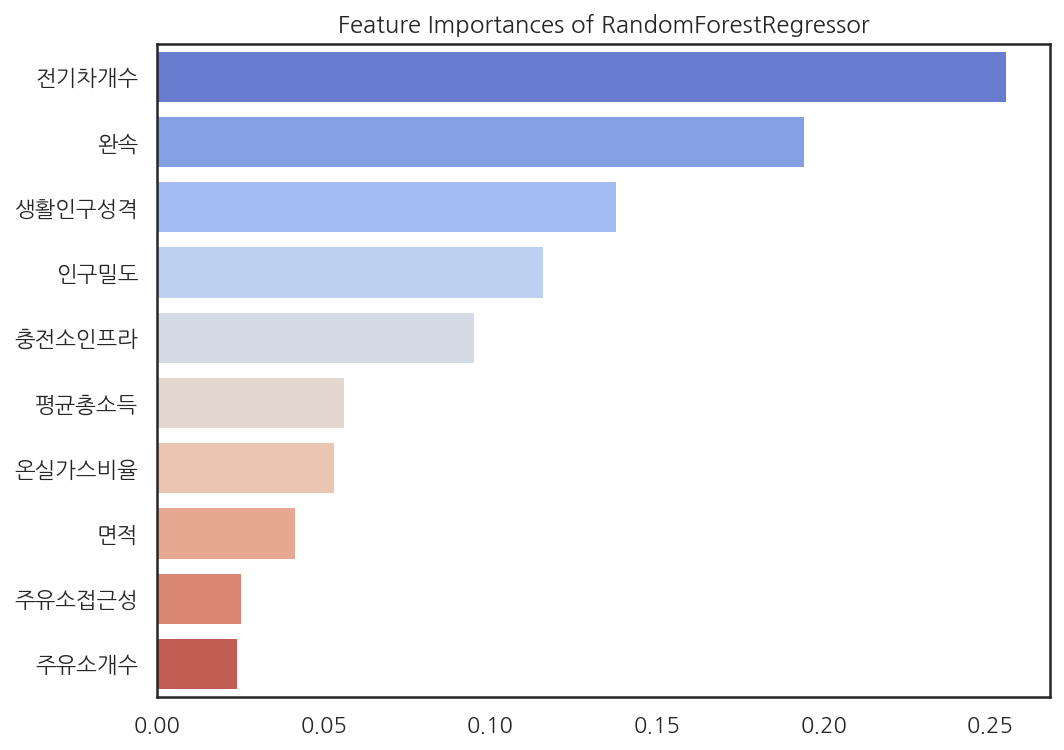

In [15]:
importances_values = regressor.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top10 = importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 6))
plt.title('Feature Importances of RandomForestRegressor')
sns.barplot(x = top10, y = top10.index, palette='coolwarm')
plt.show()

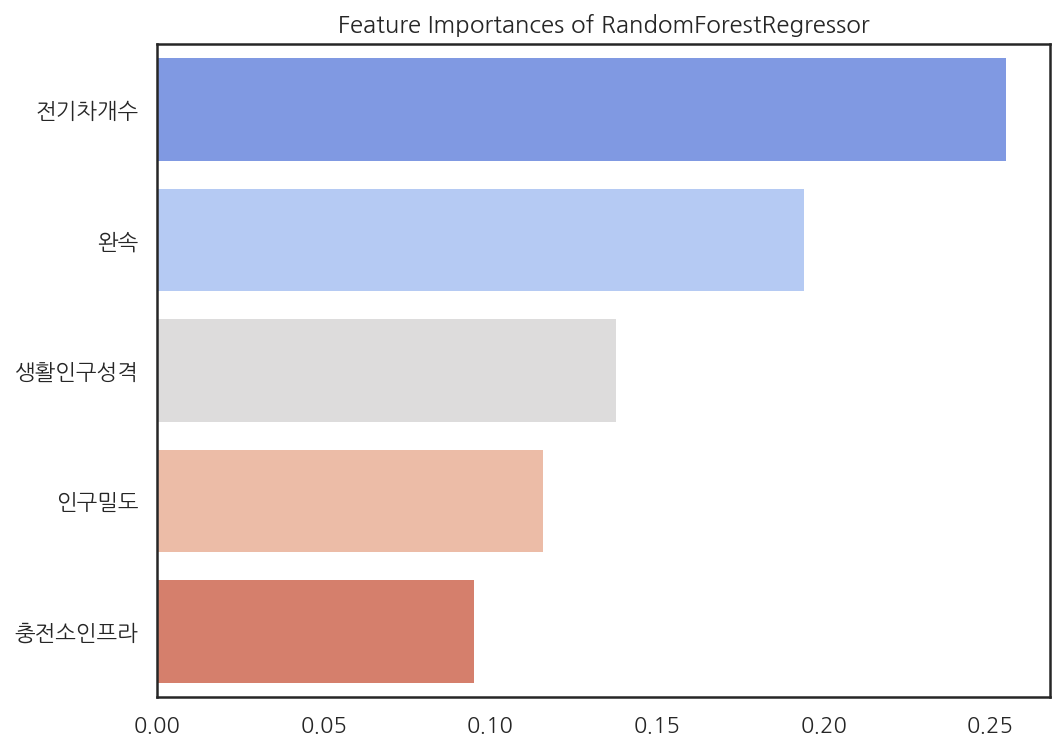

In [16]:
importances_values = regressor.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top5 = importances.sort_values(ascending=False)[:5]

plt.figure(figsize=(8, 6))
plt.title('Feature Importances of RandomForestRegressor')
sns.barplot(x = top5, y = top5.index, palette='coolwarm')
plt.show()

In [17]:
print(importances)

면적        0.041786
인구밀도      0.116184
생활인구성격    0.137882
평균총소득     0.056264
전기차개수     0.255124
완속        0.194395
충전소인프라    0.095481
주유소개수     0.024225
주유소접근성    0.025427
온실가스비율    0.053233
dtype: float64


## 2) 의사결정트리

In [18]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

mse = np.sqrt(mean_squared_error(y_pred, y_validation))
r2=r2_score(y_validation,y_pred)
errors=abs(y_validation-y_pred)
mape=100*(errors/y_validation)
accuracy=100-np.mean(mape)

print('평균제곱근오차 : ', mse)
print("r-square:",r2)
print("accuracy:",accuracy)

평균제곱근오차 :  5.454888995523958
r-square: 0.2580132905822975
accuracy: -inf


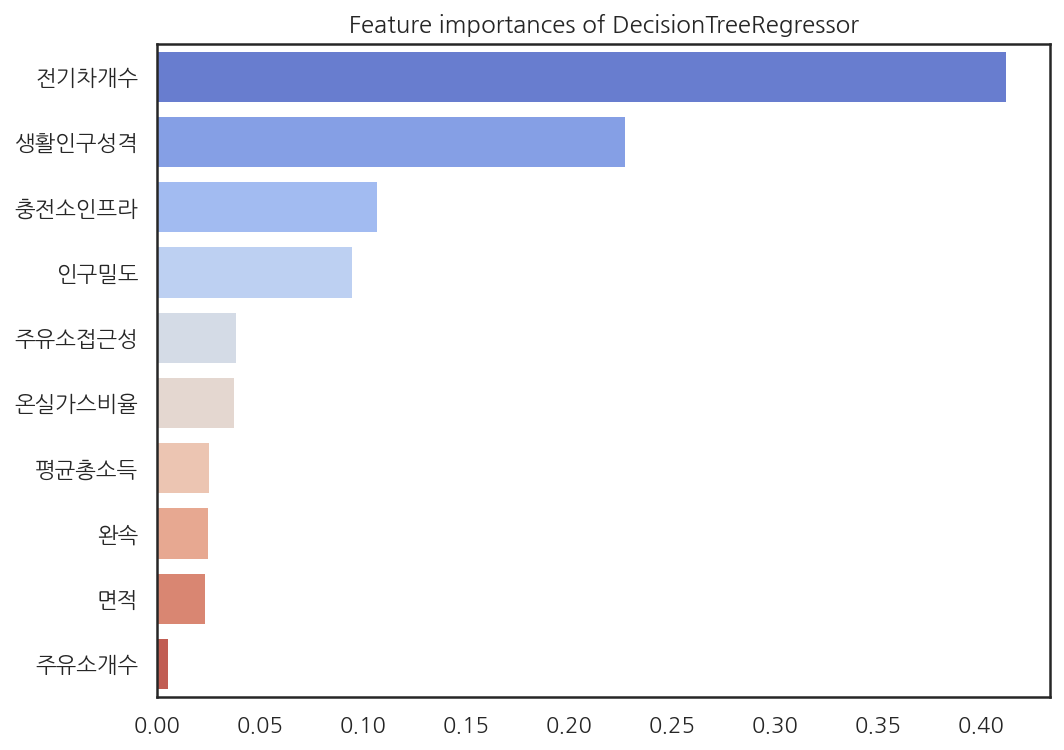

In [19]:
importances_values = model.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top10 = importances.sort_values(ascending=False)[:10]
plt.figure(figsize=(8, 6))
plt.title('Feature importances of DecisionTreeRegressor')
sns.barplot(x = top10, y = top10.index, palette='coolwarm')
plt.show()

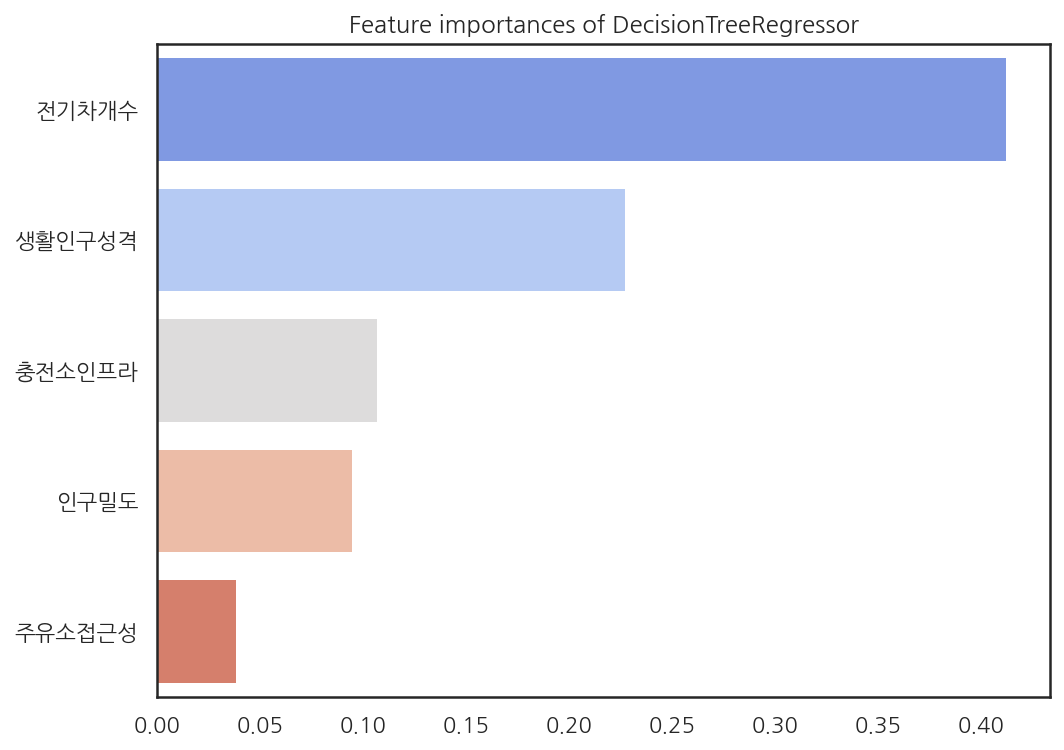

In [20]:
importances_values = model.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top5 = importances.sort_values(ascending=False)[:5]
plt.figure(figsize=(8, 6))
plt.title('Feature importances of DecisionTreeRegressor')
sns.barplot(x = top5, y = top5.index, palette='coolwarm')
plt.show()

In [21]:
print(importances)

면적        0.023486
인구밀도      0.095113
생활인구성격    0.227916
평균총소득     0.025477
전기차개수     0.412920
완속        0.025179
충전소인프라    0.107259
주유소개수     0.005639
주유소접근성    0.039015
온실가스비율    0.037996
dtype: float64


## 3) XGBoost

In [22]:
# XGBRegressor 모델 선언 후 Fitting
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)

# Fitting된 모델로 x_valid를 통해 예측을 진행
y_pred = xgbr.predict(X_validation)

feature_importance = pd.DataFrame(xgbr.feature_importances_.reshape((1, -1)), columns=X_train.columns, index=['feature_importance'])
feature_importance

,면적,인구밀도,생활인구성격,평균총소득,전기차개수,완속,충전소인프라,주유소개수,주유소접근성,온실가스비율
feature_importance,0.01963,0.10414,0.067357,0.037417,0.440957,0.076485,0.074213,0.121838,0.03585,0.022113


In [23]:
mse = np.sqrt(mean_squared_error(y_pred, y_validation))
r2=r2_score(y_validation,y_pred)
errors=abs(y_validation-y_pred)
mape=100*(errors/y_validation)
accuracy=100-np.mean(mape)

print('평균제곱근오차 : ', mse)
print("r-square:",r2)
print("accuracy:",accuracy)
print('평균제곱근오차 : ', mse)

평균제곱근오차 :  5.496637909151786
r-square: 0.246612259099652
accuracy: -inf
평균제곱근오차 :  5.496637909151786


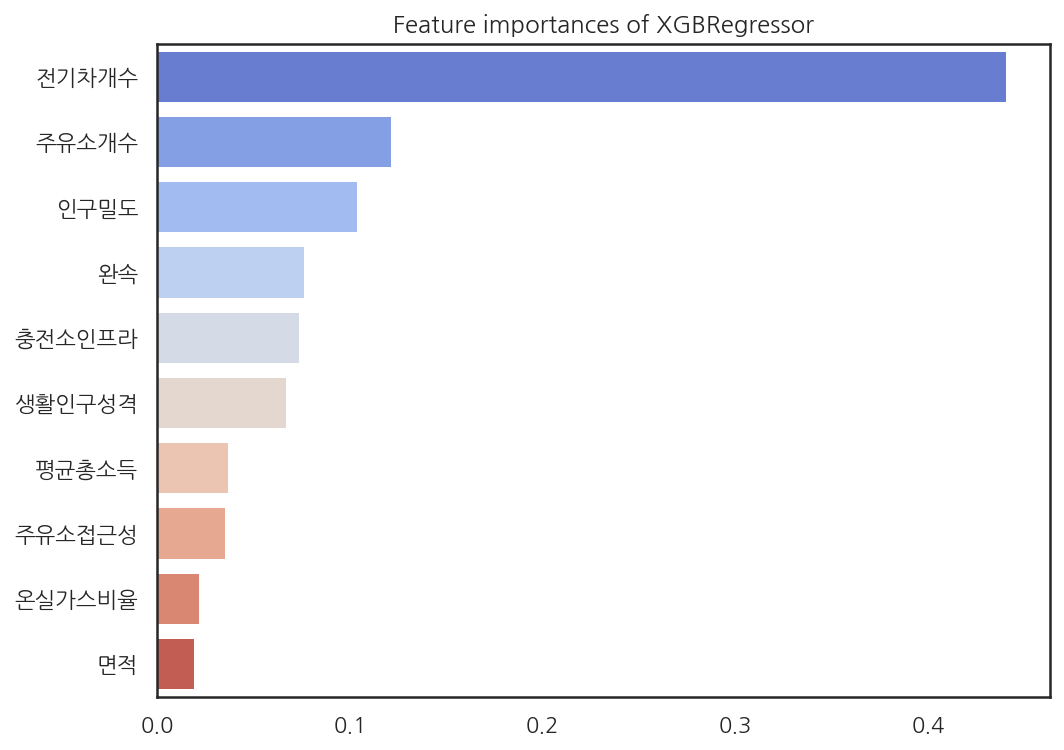

In [24]:
importances_values = xgbr.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top10 = importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8, 6))
plt.title('Feature importances of XGBRegressor')
sns.barplot(x = top10, y = top10.index, palette='coolwarm')
plt.show()

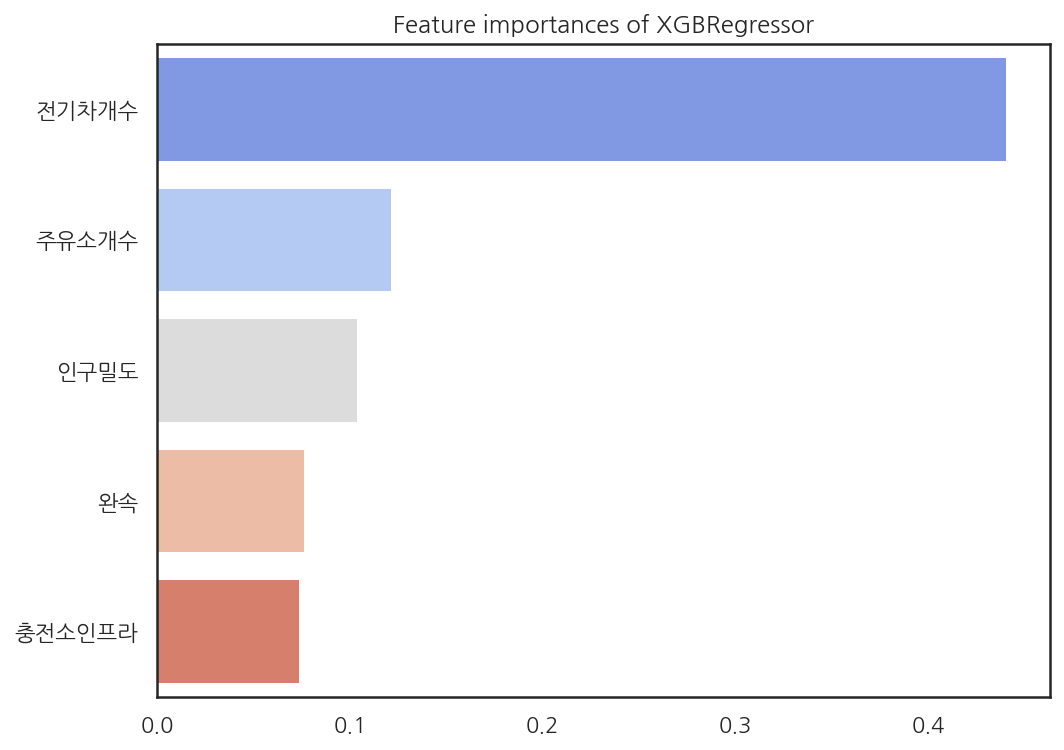

In [25]:
importances_values = xgbr.feature_importances_
importances = pd.Series(importances_values, index=X_train.columns)
top5 = importances.sort_values(ascending=False)[:5]

plt.figure(figsize=(8, 6))
plt.title('Feature importances of XGBRegressor')
sns.barplot(x = top5, y = top5.index, palette='coolwarm')
plt.show()

## 4) SHAP Value

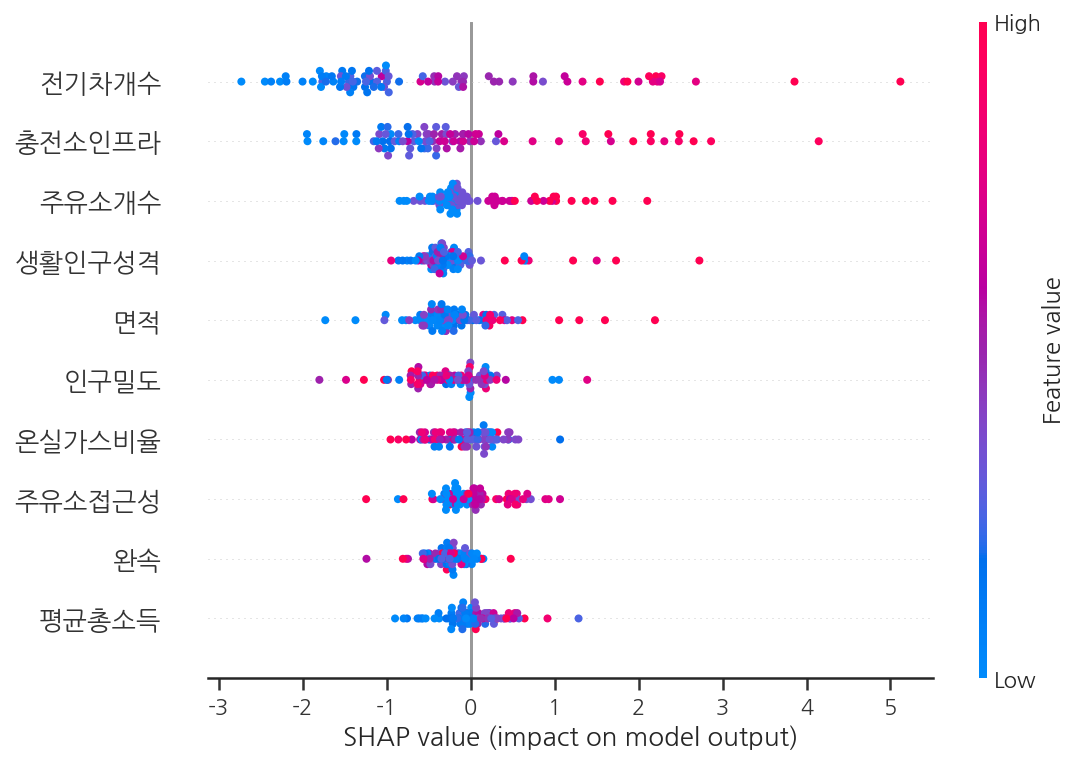

In [26]:
## SHAP Value

explainer = shap.TreeExplainer(xgbr) 
shap_values = explainer.shap_values(X_validation) 
shap.summary_plot(shap_values, X_validation)

→ 최종적으로 급속(전기차충전소)에 영향을 미치는 중요한 변수로 전기차개수와 충전소인프라를 고려.